# Assignment 9: GBDT

#### Response Coding: Example

<img src='http://i.imgur.com/TufZptV.jpg' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)+sentiment Score of eassay(check the bellow example, include all 4 values as 4 features)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
            </ul>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [1]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from nltk.sentiment import SentimentIntensityAnalyzer
# import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

<h1>1. GBDT (xgboost/lightgbm) </h1>

## 1.1 Loading Data

In [0]:
import pandas
data = pandas.read_csv('/content/drive/My Drive/9_Donors_choose_DT/preprocessed_data.csv')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
data.head(5)
print(data.columns)
print(data.shape)

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price'],
      dtype='object')
(109248, 9)


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [5]:
Y_data=data['project_is_approved']
X_data=data.drop(columns='project_is_approved')
X_data.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price'],
      dtype='object')

In [6]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
import random
from sklearn.model_selection import train_test_split
random.seed(1234)
X_train, X_test, y_train, y_test = train_test_split(X_data,Y_data,test_size = 0.33,stratify=Y_data)

print(y_train.value_counts())
print(y_test.value_counts())
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

1    62113
0    11083
Name: project_is_approved, dtype: int64
1    30593
0     5459
Name: project_is_approved, dtype: int64
(73196, 8) (73196,)
(36052, 8) (36052,)


**Finding the sentiment values for train and test data**

In [0]:

def sentiments_list(values):
  negative=[]
  neutral=[]
  positive=[]
  compound=[]
  for i in values:
    ss = sid.polarity_scores(i)
    for key,value in ss.items():
      if key == 'neg':
        negative.append(value)
      elif key== 'neu':
        neutral.append(value)
      elif key== 'pos':
        positive.append(value)
      else:
        compound.append(value)
  return negative,positive,neutral,compound


In [0]:
import pandas as pd
negative=[]
neutral=[]
positive=[]
compound=[]
negative,positive,neutral,compound=sentiments_list(X_test['essay'])



In [0]:
sentiments_score_for_test=pd.DataFrame()
sentiments_score_for_test['neg']=negative
sentiments_score_for_test['neu']=neutral
sentiments_score_for_test['pos']=positive
sentiments_score_for_test['compound']=compound

In [10]:
sentiments_score_for_test.head(4)
print(len(sentiments_score_for_test))

36052


In [0]:
negative=[]
neutral=[]
positive=[]
compound=[]
negative,positive,neutral,compound=sentiments_list(X_train['essay'])

In [0]:
sentiments_score_for_train=pd.DataFrame()
sentiments_score_for_train['neg']=negative
sentiments_score_for_train['neu']=neutral
sentiments_score_for_train['pos']=positive
sentiments_score_for_train['compound']=compound

In [13]:
sentiments_score_for_train.head(5)
sentiments_score_for_train.shape

(73196, 4)

<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

**TFIDF for essay data**

In [14]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,2),max_features=5500)
vectorizer.fit(X_train['essay'].values)
X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)

print("After TFIDF vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

After TFIDF vectorizations
(73196, 5500) (73196,)
(36052, 5500) (36052,)


In [0]:
import pickle
import numpy as np
with open('/content/drive/My Drive/Classroom/glove_vectors', 'rb') as f:
    
    wordtovecmodel = pickle.load(f)
    glove_words =  set(wordtovecmodel.keys())

tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'])
#converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

# average Word2Vec
# compute average word2vec for each review.

def tf_idf(word_list):
    tfidf_w2v_vectors = []
    for sentence in word_list: # for each review/sentence
        vector = np.zeros(300) 
        tf_idf_weight =0
        for word in sentence.split(): # for each word in a review
            if (word in glove_words) and (word in tfidf_words):
                vec = wordtovecmodel[word] 
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)

    print(len(tfidf_w2v_vectors))
    print(len(tfidf_w2v_vectors[0])) 
    return tfidf_w2v_vectors


**TFIDF word to vec for essay feature**

In [47]:
train_tfidf_w2v_vectors=tf_idf(X_train['essay'])
test_tfidf_w2v_vectors=tf_idf(X_test['essay'])

73196
300
36052
300


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [0]:
def response_coding1_for_train_data(data1,y_train):
  a=data1.value_counts() #finding the unique values
 

  name1=list(a.keys()) #listing all the unique values

  count_0=[]
  count_1=[]
  for name,value in a.items(): #unique values with their max occurance
    
    count=data1.loc[(y_train==0) & (data1==name)] 
    count_0.append((count.shape[0])/value) #unique value with the max time it occured with class label 1
    count=data1.loc[(y_train==1) & (data1==name)]
    count_1.append((count.shape[0])/value) ##unique value with the max time it occured with class label 1
 
  return count_0,count_1,name1 
  
def response_coding_for_test_data(data_test,name1,count_0,count_1):
  count_for_0=[]
  count_for_1=[]
  for i in range(len(data_test)): 
    if(data_test.iloc[i] in name1): #if the value is present in the unique list obtained from trin data
      s2=name1.index(data_test.iloc[i]) #finding its index
      count_for_0.append(count_0[s2]) #finding its value for class 0
      count_for_1.append(count_1[s2]) #finding its value for class 1
    else:
      count_for_1.append(0.5) #if value not present then putting its value as 0.5
      count_for_0.append(0.5)

  return count_for_1, count_for_0
 

In [16]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

#school_state
vectorizer = CountVectorizer()
X_train_new=pd.DataFrame()
X_test_new = pd.DataFrame()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data


count_0,count_1,name1=response_coding1_for_train_data(X_train['school_state'],y_train)
school_state_train_0, school_state_train_1 = response_coding_for_test_data(X_train['school_state'],name1,count_0,count_1)

X_train_new['school_state_train_0']=school_state_train_0
X_train_new['school_state_train_1']=school_state_train_1
X_train_new['school_state_train_0'].values.reshape(-1,1)
X_train_new['school_state_train_1'].values.reshape(-1,1)
print(X_train_new.shape)
#print("test data is:",X_test)
school_state_test_0, school_state_test_1 = response_coding_for_test_data(X_test['school_state'],name1,count_0,count_1)
X_test_new['school_state_test_0']=school_state_test_0
X_test_new['school_state_test_1']=school_state_test_1
X_test_new['school_state_test_0'].values.reshape(-1,1)
X_test_new['school_state_test_1'].values.reshape(-1,1)
print(X_test_new.shape)


(73196, 2)
(36052, 2)


In [17]:
#teacher_prefix
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)

count_0,count_1,name1=response_coding1_for_train_data(X_train['teacher_prefix'],y_train)
teacher_prefix_train_0, teacher_prefix_train_1 = response_coding_for_test_data(X_train['teacher_prefix'],name1,count_0,count_1)
X_train_new['teacher_prefix_train_0']=teacher_prefix_train_0
X_train_new['teacher_prefix_train_1']=teacher_prefix_train_1
X_train_new['teacher_prefix_train_0'].values.reshape(-1,1)
X_train_new['teacher_prefix_train_1'].values.reshape(-1,1)
print(X_train_new.shape)

print("="*100)
teacher_prefix_test_0,teacher_prefix_test_1= response_coding_for_test_data(X_test['teacher_prefix'],name1,count_0,count_1)
X_test_new['teacher_prefix_test_0']=teacher_prefix_test_0
X_test_new['teacher_prefix_test_1']=teacher_prefix_test_1
X_test_new['teacher_prefix_test_0'].values.reshape(-1,1)
X_test_new['teacher_prefix_test_1'].values.reshape(-1,1)
print(X_test_new.shape)

print("="*100)

(73196, 4)
(36052, 4)


In [18]:
#project_grade_category
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values)

count_0,count_1,name1=response_coding1_for_train_data(X_train['project_grade_category'],y_train)
project_grade_category_train_0, project_grade_category_train_1 = response_coding_for_test_data(X_train['project_grade_category'],name1,count_0,count_1)
X_train_new['project_grade_category_train_0']=project_grade_category_train_0
X_train_new['project_grade_category_train_1']=project_grade_category_train_1
X_train_new['project_grade_category_train_0'].values.reshape(-1,1)
X_train_new['project_grade_category_train_1'].values.reshape(-1,1)
print(X_train_new.shape)

print("="*100)
project_grade_category_test_0,project_grade_category_test_1= response_coding_for_test_data(X_test['project_grade_category'],name1,count_0,count_1)
X_test_new['project_grade_category_test_0']=project_grade_category_test_0
X_test_new['project_grade_category_test_1']=project_grade_category_test_1
X_test_new['project_grade_category_test_0'].values.reshape(-1,1)
X_test_new['project_grade_category_test_1'].values.reshape(-1,1)
print(X_test_new.shape)

print("="*100)

(73196, 6)
(36052, 6)


In [19]:
#clean_categories
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) 


count_0,count_1,name1=response_coding1_for_train_data(X_train['clean_categories'],y_train)
clean_categories_train_0, clean_categories_train_1 = response_coding_for_test_data(X_train['clean_categories'],name1,count_0,count_1)
X_train_new['clean_categories_train_0']=clean_categories_train_0
X_train_new['clean_categories_train_1']=clean_categories_train_1
X_train_new['clean_categories_train_0'].values.reshape(-1,1)
X_train_new['clean_categories_train_1'].values.reshape(-1,1)
print(X_train_new.shape)

print("="*100)
clean_categories_test_0,clean_categories_test_1= response_coding_for_test_data(X_test['clean_categories'],name1,count_0,count_1)
X_test_new['clean_categories_test_0']=clean_categories_test_0
X_test_new['clean_categories_test_1']=clean_categories_test_1
X_test_new['clean_categories_test_0'].values.reshape(-1,1)
X_test_new['clean_categories_test_1'].values.reshape(-1,1)
print(X_test_new.shape)

print("="*100)

(73196, 8)
(36052, 8)


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

#clean_subcategories
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values)

count_0,count_1,name1=response_coding1_for_train_data(X_train['clean_subcategories'],y_train)
clean_subcategories_train_0, clean_subcategories_train_1 = response_coding_for_test_data(X_train['clean_subcategories'],name1,count_0,count_1)

X_train_new['clean_subcategories_train_0']=clean_subcategories_train_0
X_train_new['clean_subcategories_train_1']=clean_subcategories_train_1
X_train_new['clean_subcategories_train_0'].values.reshape(-1,1)
X_train_new['clean_subcategories_train_1'].values.reshape(-1,1)
print(X_train_new.shape)

print("="*100)
clean_subcategories_test_0,clean_subcategories_test_1= response_coding_for_test_data(X_test['clean_subcategories'],name1,count_0,count_1)
X_test_new['clean_subcategories_test_0']=clean_subcategories_test_0
X_test_new['clean_subcategories_test_1']=clean_subcategories_test_1
X_test_new['clean_subcategories_test_0'].values.reshape(-1,1)
X_test_new['clean_subcategories_test_1'].values.reshape(-1,1)
print(X_test_new.shape)

print("="*100) 

(73196, 10)
(36052, 10)


In [21]:
from sklearn.preprocessing import Normalizer
#price
normalizer = Normalizer()

normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


In [22]:
#teacher_number_of_previously_posted_projects
normalizer = Normalizer()

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_teacher_number_of_previously_posted_projects = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacher_number_of_previously_posted_projects = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_teacher_number_of_previously_posted_projects.shape, y_train.shape)
print(X_test_teacher_number_of_previously_posted_projects.shape, y_test.shape)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


**Stacking done ofr set 1(tfidf)**

In [27]:
from scipy.sparse import hstack

X_tr_set1 = hstack((X_train_essay_tfidf, X_train_new,X_train_price_norm,X_train_teacher_number_of_previously_posted_projects,sentiments_score_for_train)).tocsr()

X_te_set1 = hstack((X_test_essay_tfidf,X_test_new,X_test_price_norm,X_test_teacher_number_of_previously_posted_projects,sentiments_score_for_test)).tocsr()

print("Final Data matrix")
print(X_tr_set1.shape, y_train.shape)

print(X_te_set1.shape, y_test.shape)
print("="*100)

Final Data matrix
(73196, 5516) (73196,)
(36052, 5516) (36052,)


**Stacking done ofr set 2(tfidf W2W)**

In [48]:
from scipy.sparse import hstack

X_tr_set2 = hstack((train_tfidf_w2v_vectors, X_train_new,X_train_price_norm,X_train_teacher_number_of_previously_posted_projects,sentiments_score_for_train)).tocsr()

X_te_set2 = hstack((test_tfidf_w2v_vectors,X_test_new,X_test_price_norm,X_test_teacher_number_of_previously_posted_projects,sentiments_score_for_test)).tocsr()

print("Final Data matrix")
print(X_tr_set2.shape, y_train.shape)

print(X_te_set2.shape, y_test.shape)
print("="*100)  

Final Data matrix
(73196, 316) (73196,)
(36052, 316) (36052,)


<h2>1.5 Appling Models on different kind of featurization as mentioned in the instructions</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [28]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    # d. Y-axis label
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
lgb_gbdt = lgb.LGBMClassifier(boosting_type='gbdt', learning_rate=0.01, metric='auc')
parameters = [{'max_depth': [5,10,50,100],  'n_estimators' : [10,20,50,200]}]
grid = GridSearchCV(estimator = lgb_gbdt, param_grid= parameters, cv = 3,return_train_score=True)
grid = grid.fit(X_tr_set1, y_train)
results1 = pd.DataFrame.from_dict(grid.cv_results_)
print(results1)
best_score = grid.best_score_
results = grid.best_params_
print(best_score)
print(results)

    mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0        7.015592      0.127108  ...          0.848585         0.000009
1       11.347028      0.159758  ...          0.848585         0.000009
2       24.851332      0.313232  ...          0.848585         0.000009
3       81.530921      0.640410  ...          0.848673         0.000052
4        9.843609      0.126706  ...          0.848585         0.000009
5       17.564187      0.105294  ...          0.848585         0.000009
6       40.844892      0.542731  ...          0.848585         0.000009
7      151.316607      0.291177  ...          0.848619         0.000018
8       10.276248      0.157600  ...          0.848585         0.000009
9       18.190061      0.272441  ...          0.848585         0.000009
10      42.308475      0.376929  ...          0.848585         0.000009
11     172.680340      0.450036  ...          0.848612         0.000019
12      10.132873      0.129240  ...          0.848585         0

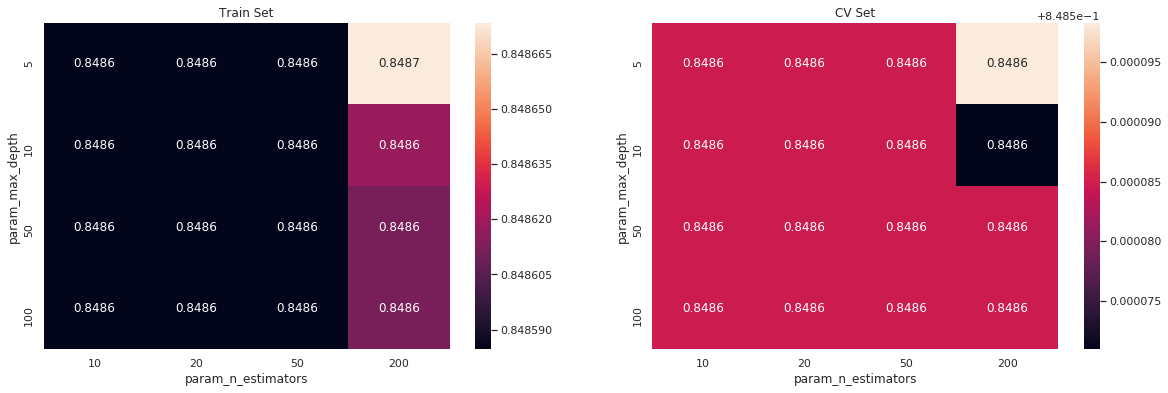

In [37]:
#heatmap
import seaborn as sns; sns.set()
import pandas as pd
import matplotlib.pyplot as plt

max_scores1 = pd.DataFrame(grid.cv_results_).groupby(["param_max_depth","param_n_estimators"]).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

In [0]:
best_parameters=[{'max_depth':[5],'n_estimators':[200]}]

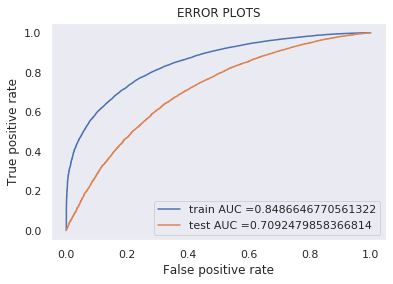

In [42]:
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

clf11 = GridSearchCV(lgb.LGBMClassifier(class_weight='balanced'),best_parameters)
clf11.fit(X_tr_set1, y_train)
y_test_predicted=clf11.predict_proba(X_te_set1)[:,1]
y_train_predicted=clf11.predict_proba(X_tr_set1)[:,1]


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_predicted)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_predicted)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [0]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    global predictions_list
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions_list=predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.5858776521029548 for threshold 0.49


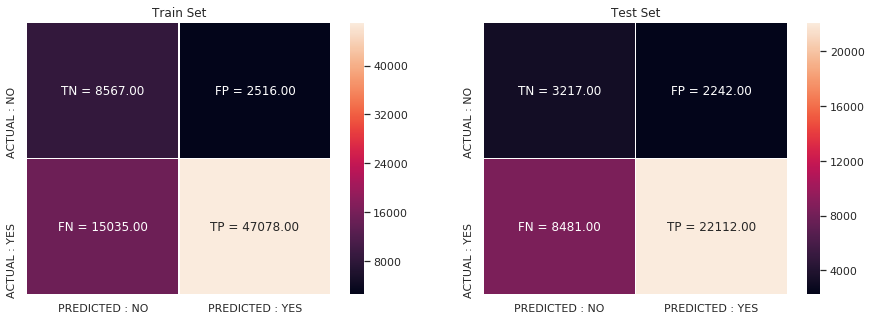

In [44]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

conMat_train=confusion_matrix(y_train, predict_with_best_t(y_train_predicted, best_t))

conMat_test=confusion_matrix(y_test, predict_with_best_t(y_test_predicted, best_t))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(15,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), conMat_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), conMat_test.flatten())])).reshape(2,2)

sns.heatmap(conMat_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(conMat_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

In [49]:
lgb_gbdt = lgb.LGBMClassifier(boosting_type='gbdt', learning_rate=0.01, metric='auc')
parameters =[{'max_depth': [5,10,50,100],  'n_estimators' : [10,20,50,200]}]
grid = GridSearchCV(estimator = lgb_gbdt, param_grid= parameters, cv = 3,return_train_score=True)
grid = grid.fit(X_tr_set2, y_train)
results1 = pd.DataFrame.from_dict(grid.cv_results_)
print(results1)
best_score = grid.best_score_
results = grid.best_params_
print(best_score)
print(results)

    mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0        4.522455      0.073392  ...          0.848585         0.000009
1        5.449837      0.055866  ...          0.848585         0.000009
2        8.748943      0.110134  ...          0.848585         0.000009
3       24.785817      0.175273  ...          0.848605         0.000011
4        4.630684      0.058174  ...          0.848585         0.000009
5        6.217438      0.091668  ...          0.848585         0.000009
6       11.180991      0.184350  ...          0.848585         0.000009
7       34.816452      0.097181  ...          0.848701         0.000061
8        4.659286      0.081138  ...          0.848585         0.000009
9        6.275256      0.065508  ...          0.848585         0.000009
10      11.231490      0.088980  ...          0.848585         0.000009
11      35.368992      0.042652  ...          0.848694         0.000067
12       4.726362      0.088694  ...          0.848585         0

In [0]:
best_parameters=[{'max_depth':[10],'n_estimators':[200]}]

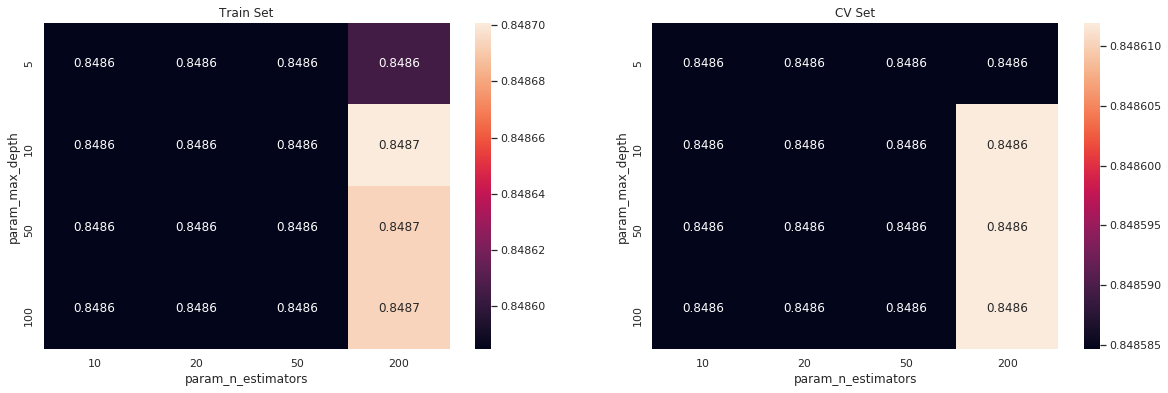

In [52]:
#heatmap
import seaborn as sns; sns.set()
import pandas as pd

max_scores1 = pd.DataFrame(grid.cv_results_).groupby(["param_max_depth","param_n_estimators"]).max().unstack()[['mean_test_score', 'mean_train_score']]


fig, ax = plt.subplots(1,2, figsize=(20,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

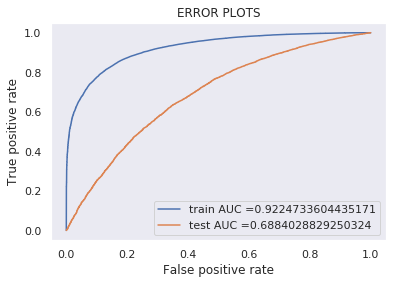

In [57]:
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

clf11 = GridSearchCV(lgb.LGBMClassifier(class_weight='balanced'),best_parameters)
clf11.fit(X_tr_set2, y_train)
y_test_predicted=clf11.predict_proba(X_te_set2)[:,1]
y_train_predicted=clf11.predict_proba(X_tr_set2)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_predicted)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_predicted)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [0]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    global predictions_list
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions_list=predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.7079759262477868 for threshold 0.496


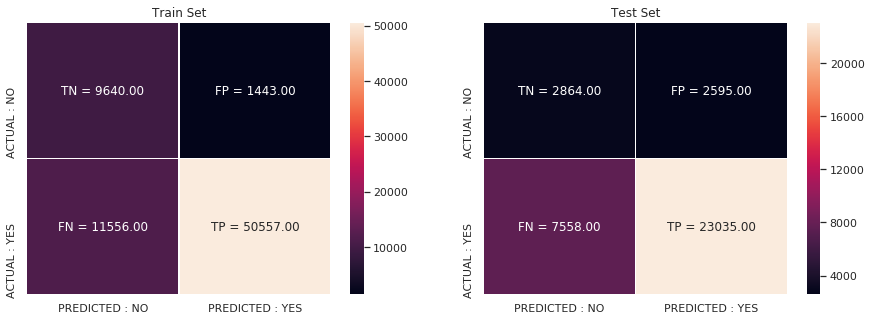

In [59]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

conMat_train=confusion_matrix(y_train, predict_with_best_t(y_train_predicted, best_t))

conMat_test=confusion_matrix(y_test, predict_with_best_t(y_test_predicted, best_t))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))

fig, ax = plt.subplots(1,2, figsize=(15,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), conMat_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), conMat_test.flatten())])).reshape(2,2)

sns.heatmap(conMat_train, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax=ax[0])
sns.heatmap(conMat_test, linewidths=.5, xticklabels=['PREDICTED : NO', 'PREDICTED : YES'], yticklabels=['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

<h1>3. Summary</h1>

<br> as mentioned in the step 4 of instructions

In [60]:
#how to use pretty table http://zetcode.com/python/prettytable/ 
from prettytable import PrettyTable 
tb = PrettyTable()
tb.field_names= (" Vectorizer  ", "  Model  ", "  Max depth  ","  n-estimators  ","  AUC  ")
tb.add_row(["   Tfidf","lightgbm"  , 5,200 ,70]) 
tb.add_row(["  TfidfW2V", "lightgbm" , 10,200 , 68]) 

print(tb.get_string(titles = "GBDT Observations"))

+---------------+-----------+---------------+------------------+---------+
|  Vectorizer   |   Model   |   Max depth   |   n-estimators   |   AUC   |
+---------------+-----------+---------------+------------------+---------+
|       Tfidf   |  lightgbm |       5       |       200        |    70   |
|     TfidfW2V  |  lightgbm |       10      |       200        |    68   |
+---------------+-----------+---------------+------------------+---------+
